# VISUALIZACION DE LOS DATOS

In [2]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

In [4]:
AGE = 0; SEX = 1; MASS_INDEX = 2; BLOOD_PRESSURE = 3;
# print (diabetes.DESCR)  #Text information about this dataset

print("-Contains 442 samples (rows) and 10 features (columns)")
print(X.shape, "\n")  # Contains 442 samples (rows) and 10 features (columns)

print("-Adequate for Regression. The target are numbers.")
print(y.shape, "\n")  # Adequate for Regression. The target are numbers.

print("-Print rows of data, starting from row 0 to row 5-1")
print(X[0:5,:], "\n") # print rows of data, starting from row 0 to row 5-1

print("-Rows of target data, starting from row 0 to row 5-1")
print(y[0:5], "\n")   # Rows of target data, starting from row 0 to row 5-1

print("-Print the feature MASS_INDEX from the third row")
print(X[1,MASS_INDEX], "\n") # print the feature MASS_INDEX from the third row

print("-Print the feature AGE for rows 1 and 2")
print(X[1:3,AGE], "\n") # print the feature AGE for rows 1 and 2

-Contains 442 samples (rows) and 10 features (columns)
(442, 10) 

-Adequate for Regression. The target are numbers.
(442,) 

-Print rows of data, starting from row 0 to row 5-1
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]] 

-Rows of target data, starting from row 0 to row 5-1
[151.  75. 141. 206. 135.] 

-Print the feature MASS_INDEX from the third row
-0.0514740612388061 

-Print the feature AGE for rows 1 and 2
[

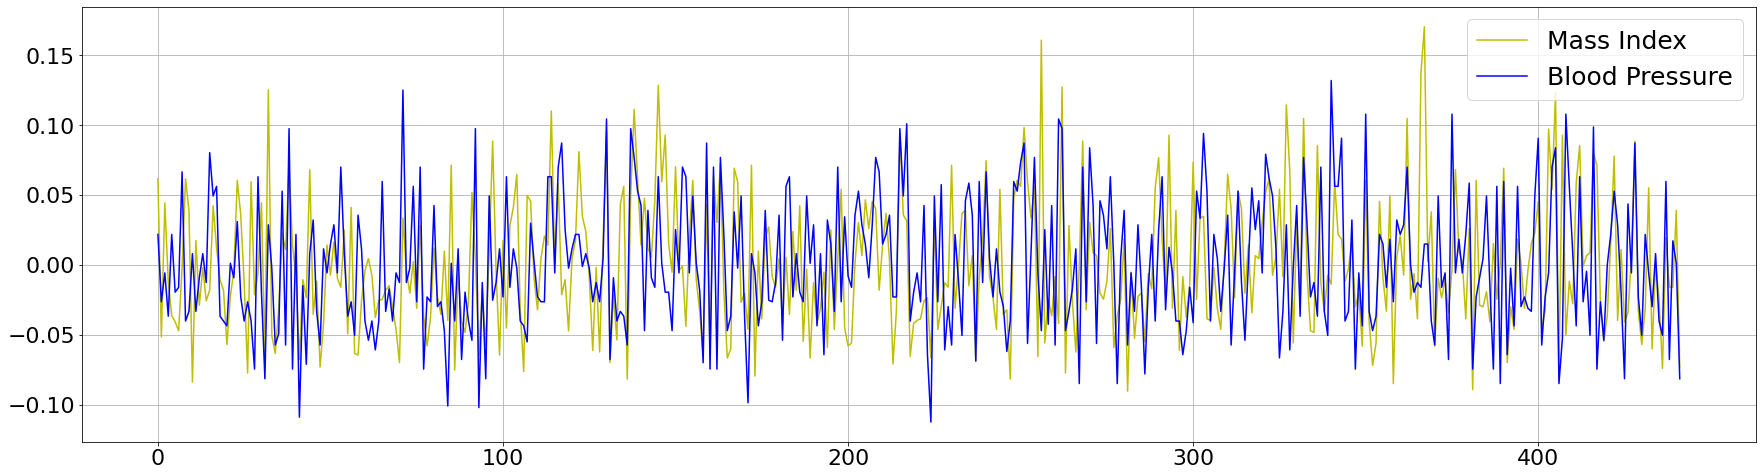

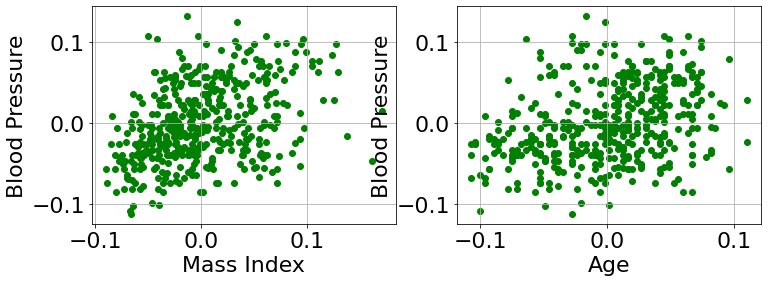

In [ ]:
x = range(0, diabetes.data.shape[0],1)  # same as x = range(0, len(y),1)

# Plot of several features
plt.figure(figsize=(30,8))
plt.plot(x, X[:,MASS_INDEX], 'y-', label = 'Mass Index')
plt.plot(x, X[:,BLOOD_PRESSURE], 'b-', label = 'Blood Pressure')
plt.rcParams.update({'font.size':22});
plt.legend(prop={'size':25}); plt.grid(); plt.show()

fig, axs = plt.subplots(1,2, figsize=(12,4))

# Scatterplots of several features
for fig, feature, label in zip(range(2),[MASS_INDEX,AGE],
                                        ['Mass Index', 'Age']):
    axs[fig].scatter(X[:,feature],X[:,BLOOD_PRESSURE],c='g', marker="o")
    axs[fig].set_xlabel(label); axs[fig].set_ylabel('Blood Pressure')
    axs[fig].grid(); 

plt.show()

# IMPLEMENTACION DEL MODELO

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
# random_state -> se usa porque al hacer distintas ejecuciones sucesivas, cogerá los mismos datos de entrenamiento y testeo.

model = Sequential()
model.add(Dense(25, input_dim=X.shape[1], activation='relu'))   
model.add(Dense(1))

model.summary()


model.compile(loss='MeanSquaredError', optimizer='adam', metrics = 'mae')

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=50, batch_size=4, verbose=1)

#VISUALIZACION DE LOS RESULTADOS

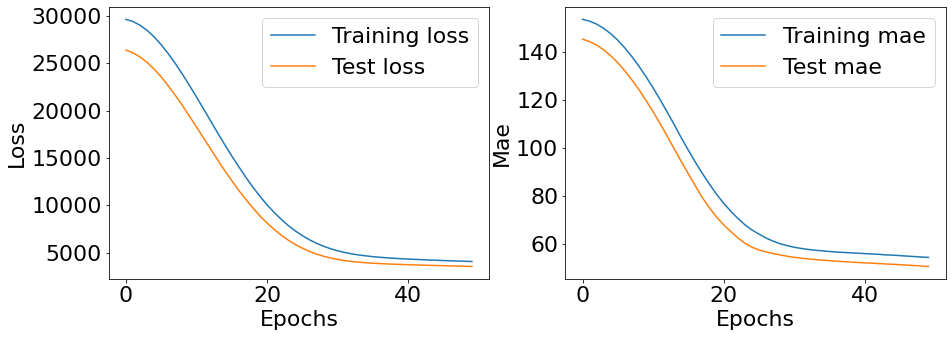

In [ ]:
def plot(history):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].plot(history.history['loss'], label='Training loss')
    ax[0].plot(history.history['val_loss'], label='Test loss')

    ax[0].legend()
    
    ax[1].plot(history.history['mae'], label='Training mae')
    ax[1].plot(history.history['val_mae'], label='Test mae')
    
    ax[1].legend()
    
    ax[0].set_xlabel('Epochs')
    ax[1].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Mae')
    
    # Para visualizar mejor el loss respecto al cero
    # ax[0].set_ylim(0, 1)

plot(history)